<a href="https://colab.research.google.com/github/jrivest2/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/Justin_Rivest_LS_DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

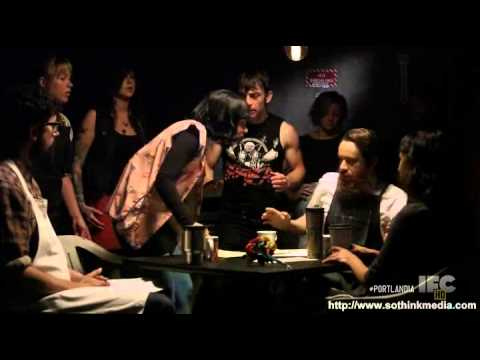

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'/content'

In [24]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [25]:
# Start here 
# test = shops
def fixStars(text):
  return float(text[:2])
# test['star_rating'] = test['star_rating'].apply(fixStars)

In [8]:
# test

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0
...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0


In [9]:
# test.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
dtype: object

In [11]:
# test.sort_values('star_rating',ascending=False)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0
2957,Thunderbird Coffee,10/1/2015 Great spot to stop in and grab a cu...,5.0
2911,Thunderbird Coffee,9/30/2016 Winter is coming...Yeah right! Aust...,5.0
5984,La Tazza Fresca,10/4/2015 I love this coffee place cause its ...,5.0
5983,La Tazza Fresca,8/2/2016 My favorite of the coffee shops duri...,5.0
...,...,...,...
4123,Halcyon,6/18/2016 So many issues here... 1.) the serv...,1.0
3189,Cherrywood Coffeehouse,5/15/2016 The staff was very rude to our grou...,1.0
2128,Houndstooth Coffee,12/31/2015 Barista totally skipped over me fo...,1.0
3807,Cream Whiskers,9/14/2016 Did you know that humans are very p...,1.0


In [3]:
!python -m spacy download en_core_web_lg


     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=8d13587d1d0a5bbedc1f87ce3bb5f5ac0f5c12a4a9aedf03b215dd498c58a2c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-zuzcljo7/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [26]:
import spacy
from spacy.tokenizer import Tokenizer
from collections import Counter
import re

In [27]:
nlp = spacy.load("en_core_web_lg")

# Cleaning

In [28]:
shops['star_rating'] = shops['star_rating'].apply(fixStars)

In [29]:
shops = shops.sort_values('star_rating',ascending=False)

In [35]:
results = re.search('(?:[0-9]+/){2}[0-9]{4}', "11/2/2020 dld lalalala my name is doggo!!!!!")
results[0]

'11/2/2020'

In [36]:
shops['review_dates'] = shops['full_review_text'].apply(lambda text: re.search('(?:[0-9]+/){2}[0-9]{4}', text)[0])
shops

,coffee_shop_name,full_review_text,star_rating,review_dates
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,11/25/2016
2957,Thunderbird Coffee,10/1/2015 Great spot to stop in and grab a cu...,5.0,10/1/2015
2911,Thunderbird Coffee,9/30/2016 Winter is coming...Yeah right! Aust...,5.0,9/30/2016
5984,La Tazza Fresca,10/4/2015 I love this coffee place cause its ...,5.0,10/4/2015
5983,La Tazza Fresca,8/2/2016 My favorite of the coffee shops duri...,5.0,8/2/2016
...,...,...,...,...
4123,Halcyon,6/18/2016 So many issues here... 1.) the serv...,1.0,6/18/2016
3189,Cherrywood Coffeehouse,5/15/2016 The staff was very rude to our grou...,1.0,5/15/2016
2128,Houndstooth Coffee,12/31/2015 Barista totally skipped over me fo...,1.0,12/31/2015
3807,Cream Whiskers,9/14/2016 Did you know that humans are very p...,1.0,9/14/2016


In [37]:
shops['full_review_text']= shops['full_review_text'].apply(lambda text: re.sub('(?:[0-9]+/){2}[0-9]{4}', '', text))
shops

,coffee_shop_name,full_review_text,star_rating,review_dates
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0,11/25/2016
2957,Thunderbird Coffee,Great spot to stop in and grab a cup of coff...,5.0,10/1/2015
2911,Thunderbird Coffee,Winter is coming...Yeah right! Austin's perf...,5.0,9/30/2016
5984,La Tazza Fresca,I love this coffee place cause its divey and...,5.0,10/4/2015
5983,La Tazza Fresca,My favorite of the coffee shops during our t...,5.0,8/2/2016
...,...,...,...,...
4123,Halcyon,So many issues here... 1.) the service was h...,1.0,6/18/2016
3189,Cherrywood Coffeehouse,The staff was very rude to our group. They t...,1.0,5/15/2016
2128,Houndstooth Coffee,Barista totally skipped over me for my order...,1.0,12/31/2015
3807,Cream Whiskers,Did you know that humans are very perceptive...,1.0,9/14/2016


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [38]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [45]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: (x / total)*100)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum() 

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: (x / total_docs)*100)
        
        return wc.sort_values(by='rank')

In [46]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [47]:
wc = count(shops['tokens'])
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,the,6847,34809,1.0,4.497746,4.497746,89.902836
26,and,6864,26650,2.0,3.443504,7.941250,90.126050
48,a,6246,22755,3.0,2.940223,10.881472,82.011555
36,i,5528,20237,4.0,2.614866,13.496339,72.584034
27,to,5653,17164,5.0,2.217797,15.714136,74.225315
...,...,...,...,...,...,...,...
20486,volumes,1,1,20489.0,0.000129,99.999483,0.013130
20491,unenthusiastic,1,1,20490.0,0.000129,99.999612,0.013130
20488,spoken,1,1,20491.0,0.000129,99.999742,0.013130
20490,melange,1,1,20492.0,0.000129,99.999871,0.013130


In [43]:
wc.value_counts().sum()

20493

In [44]:
shops['star_rating'].value_counts(normalize=True)

5.0    0.496324
4.0    0.309874
3.0    0.096901
2.0    0.060399
1.0    0.036502
Name: star_rating, dtype: float64

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

